# Chocolate Bar Rating

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
data=pd.read_csv("flavors_of_cacao.csv")

In [3]:
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### Data Exploration

In [4]:
data.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### Preprocessing

In [6]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [7]:
data1=data.dropna(axis=0)

In [8]:
data1

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [9]:
data1.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

### If we see the column names, there is some column names which difficult to spell, we’ll try to rename columns.

In [10]:
data1.columns=['company','specificorigin','REF','Review\nDate','cocoapercent','location','rating','Beantype','Broadorigin']

In [11]:
data1

,company,specificorigin,REF,Review\nDate,cocoapercent,location,rating,Beantype,Broadorigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


### Changing the datatype of cocoa percent into float

In [12]:
def removePercents(data1):
    return data1.apply(lambda x: float(x.strip('%'))/100)

In [13]:
removePercents(data1['cocoapercent'])

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: cocoapercent, Length: 1793, dtype: float64

In [14]:
data1['cocoapercent']=removePercents(data1['cocoapercent'])

C:\Users\vishw\AppData\Local\Temp/ipykernel_980/2070766692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cocoapercent']=removePercents(data1['cocoapercent'])


In [15]:
data1

,company,specificorigin,REF,Review\nDate,cocoapercent,location,rating,Beantype,Broadorigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [16]:
len(data1['specificorigin'].unique())

1038

### Data visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


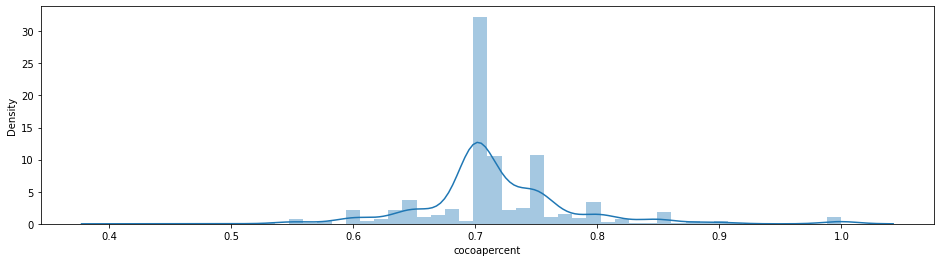

In [17]:
plt.subplots(figsize=[16,4])
sns.distplot(data1['cocoapercent'])
plt.show()

#### As we can see visualization, Most of the choclate has 70% of cocoa in them

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution by Year')

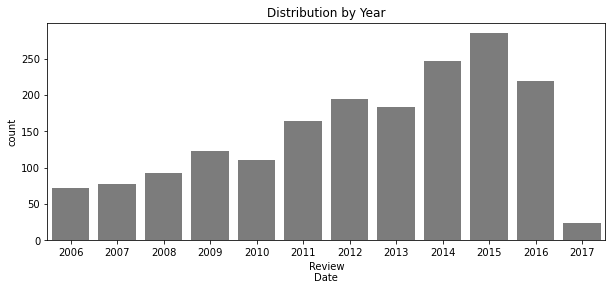

In [18]:
plt.subplots(figsize = [10, 4])
sns.countplot(data1['Review\nDate'], color = '#7C7C7C')
plt.title('Distribution by Year')

#### Since 2006, when just 71 chocolate bars were rated, there was an annual upward trend until it peaked at 285 in 2015, but has since dipped significantly when just 105 bars were rated last year (2017). 


<AxesSubplot:xlabel='rating', ylabel='count'>

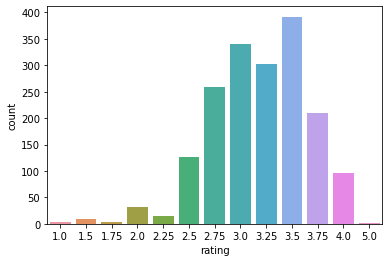

In [19]:
sns.countplot(x = data1['rating'])

#### The most number of ratings that were given was between 3.0 to 3.5, with the highest being 3.5 with a number of around 380 ratings. This shows us that most individuals are giving chocolate bars a rating of a little bit more than satisfactory.

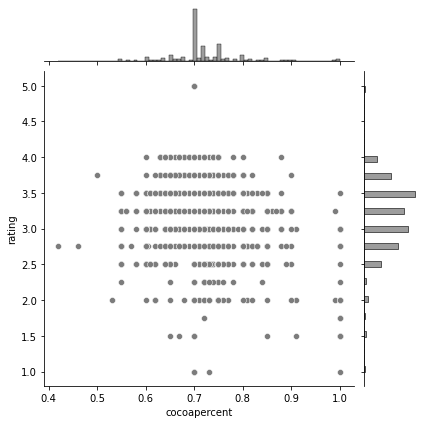

In [20]:
sns.jointplot(x = 'cocoapercent', y ='rating', data = data1, color = '#7C7C7C')
plt.show()

#### In the plot below, we see that cocoa percentage and ratings have a weak relationship, though it does lean slightly negative where a higher cocoa percentage corresponds to a lower rating.


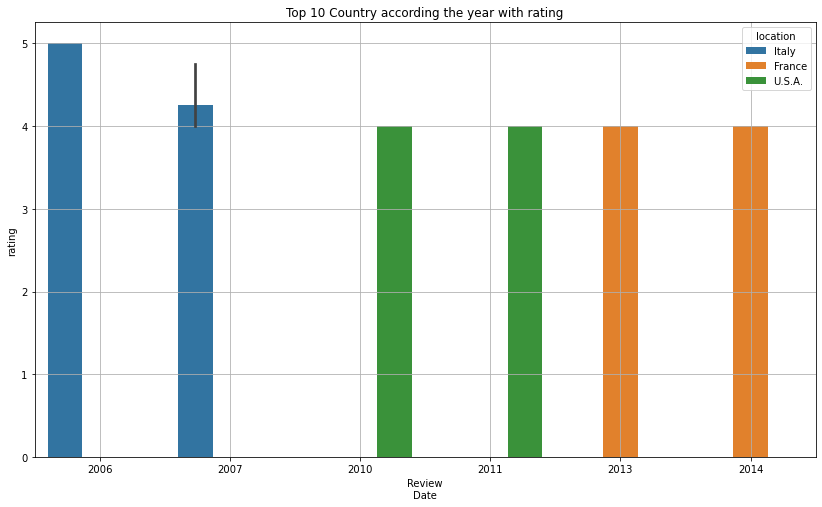

In [21]:
#top 10 rating
a = data1.nlargest(10,'rating')

#visualizing
plt.figure(figsize= (14,8))
plt.title('Top 10 Country according the year with rating')
sns.barplot(hue='location',x= 'Review\nDate', y='rating',data=a)
plt.grid();

#### As per visualization, in 2016 the rating of cocoa bean is high in Italy location of country.

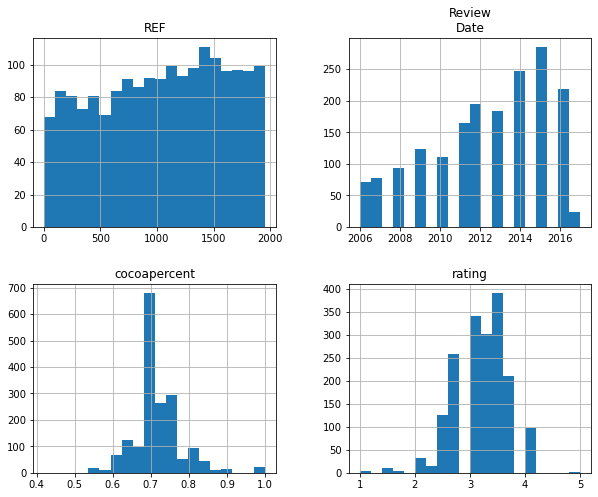

In [22]:
data1.hist(figsize=(10,8), bins=20)
plt.show()

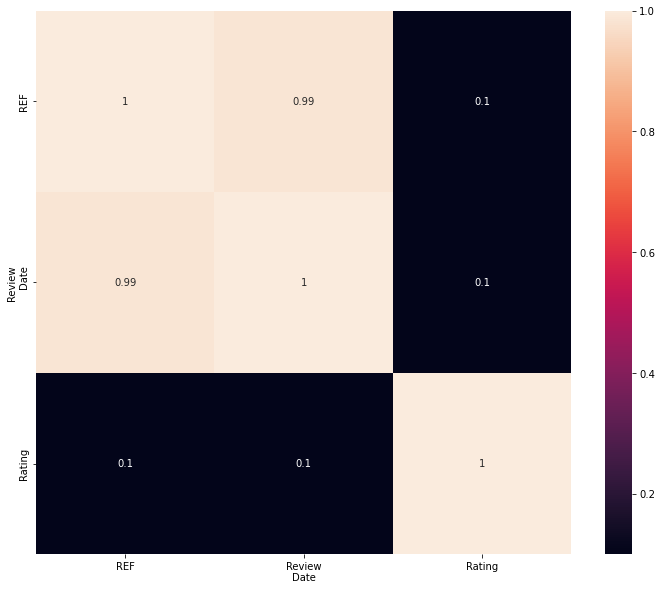

In [23]:
 plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Categorical data encoding with one hot technique

In [24]:
categorical_features=['company', 'specificorigin', 'location', 'Beantype', 'Broadorigin']

In [25]:
def onehot_encode(data1,columns):
    for column in columns:
        dummies=pd.get_dummies(data1[column])
        data1=pd.concat([data1,dummies],axis=1)
        data1.drop(column,axis=1, inplace=True)
    return data1

In [26]:
data1=onehot_encode(data1, categorical_features)


### Define dependent and independent variable

In [27]:
y=data1['rating']
x=data1.drop('rating',axis=1)

In [28]:
x

,REF,Review\nDate,cocoapercent,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,Venezuela,"Venezuela, Carribean","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Venezuela/ Ghana,Vietnam,West Africa,
0,1876,2016,0.63,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1676,2015,0.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1676,2015,0.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1680,2015,0.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1704,2015,0.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,647,2011,0.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,749,2011,0.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,749,2011,0.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,781,2011,0.62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()
x= scaler.fit_transform(x)

### Training Model

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
reg_rf= RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_pred=reg_rf.predict(x_test)

In [34]:
reg_rf.score(x_train,y_train)

0.8886521889331689

In [35]:
reg_rf.score(x_test,y_test)

0.14944591982373345

### we find from all algorithms, random forest is give best score for model 

# The End